<a href="https://colab.research.google.com/github/wuziqin/wuziqin/blob/master/Copy_of_LSTM2(07_08_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the packages
import math
import statistics 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
!pip install tensorflow


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [2]:
# loads the raw data 
newdata = pd.read_csv("/content/NEWDATASET_1.csv")
newdata['Date']=pd.to_datetime(newdata.Date, format='%Y%m', errors='ignore')
newdata=newdata[:-1]
newdata=newdata[1:]
newdata.drop('MyUnknownColumn',axis=1,inplace=True)
newdata


,Date,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,return,return_1,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
1,1927-03-01 00:00:00,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1,0.458233,1.035433,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1.0,1.0,1.0
2,1927-04-01 00:00:00,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1,1.035433,5.952800,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1.0,1.0,1.0
3,1927-05-01 00:00:00,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1,5.952800,-2.314500,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1.0,1.0,1.0
4,1927-06-01 00:00:00,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1,-2.314500,8.189167,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1.0,1.0,1.0
5,1927-07-01 00:00:00,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.370000,1.270000,0.00000,-0.40171,1,1,1,8.189167,3.085333,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,2018-07-01 00:00:00,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,3.556067,3.130467,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1098,2018-08-01 00:00:00,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,3.130467,0.344633,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1099,2018-09-01 00:00:00,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,0.344633,-7.018400,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1100,2018-10-01 00:00:00,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-7.018400,1.810500,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


Text(0.5, 1.0, 'excess return')

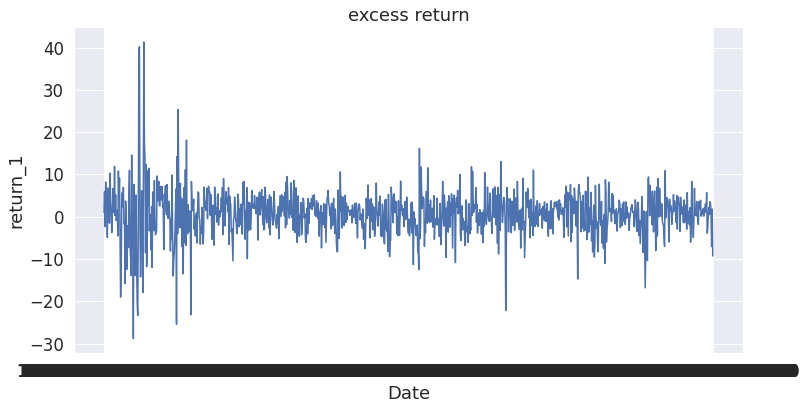

In [3]:
plt.figure(figsize=(12,6))
sns.lineplot(x=newdata.Date, y=newdata['return_1'], data=newdata).set_title("excess return")

In [4]:
x_1=newdata.iloc[:,:13]
x_2=newdata.iloc[:,15:]
y=newdata.iloc[:,14]
y = pd.DataFrame(y)
date=pd.DataFrame(newdata.iloc[:,0])

x_2 = pd.concat([date,x_2],axis = 1)
x = pd.merge(left=x_1, right=x_2, how='inner',
               left_on='Date', right_on='Date')




In [5]:
x

,Date,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
0,1927-03-01 00:00:00,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1.0,1.0,1.0
1,1927-04-01 00:00:00,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1.0,1.0,1.0
2,1927-05-01 00:00:00,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1.0,1.0,1.0
3,1927-06-01 00:00:00,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1.0,1.0,1.0
4,1927-07-01 00:00:00,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.370000,1.270000,0.00000,-0.40171,1,1,1,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2018-07-01 00:00:00,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1097,2018-08-01 00:00:00,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1098,2018-09-01 00:00:00,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1099,2018-10-01 00:00:00,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


In [6]:
y

,return_1
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
5,3.085333
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500


In [7]:
#split the training and testing set
train_x=x.iloc[0:900,1:]
test_x=x.iloc[900:,1:]
train_y=y.iloc[0:900,:]
test_y=y.iloc[900:,:]

In [8]:
train_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
0,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.11,1.31,1.21951,0.80666,1,1,1,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.18,1.20,-2.95858,-0.40171,1.0,1.0,1.0
1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.06,1.25,-0.60241,1.20031,1,1,1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.11,1.31,1.21951,0.80666,1.0,1.0,1.0
2,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.06,1.30,-1.21212,-2.37215,1,1,1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.06,1.25,-0.60241,1.20031,1.0,1.0,1.0
3,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.27,1.24,-0.61350,0.80993,1,1,1,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.06,1.30,-1.21212,-2.37215,1.0,1.0,1.0
4,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.37,1.27,0.00000,-0.40171,1,1,1,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.27,1.24,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-4.209781,-3.666160,20.003052,-1.926667,-0.553333,2.90,1.97,-0.07496,-0.38242,0,0,0,-4.191928,-3.604664,19.445156,-1.775833,-0.271667,2.78,1.75,0.00000,-0.12397,0.0,0.0,0.0
896,-4.282180,-3.784187,20.021830,-1.858333,-0.064167,3.66,1.44,-2.25056,-0.43513,0,0,0,-4.209781,-3.666160,20.003052,-1.926667,-0.553333,2.90,1.97,-0.07496,-0.38242,0.0,0.0,0.0
897,-4.289641,-3.839448,20.142345,-1.698333,0.141667,4.06,1.02,-0.38373,-0.48993,0,0,0,-4.282180,-3.784187,20.021830,-1.858333,-0.064167,3.66,1.44,-2.25056,-0.43513,0.0,0.0,0.0
898,-4.274156,-3.823617,19.489259,-1.446667,0.075833,4.04,0.86,-1.30971,0.02354,0,0,0,-4.289641,-3.839448,20.142345,-1.698333,0.141667,4.06,1.02,-0.38373,-0.48993,0.0,0.0,0.0


In [9]:
test_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
900,-4.289675,-3.838442,15.957904,-0.825000,0.376667,4.250000,0.770000,-0.07782,-0.02646,0,0,1,-4.253383,-3.802497,16.903434,-1.104167,0.004167,3.900000,0.880000,0.31226,0.63210,0.0,0.0,0.0
901,-4.219764,-3.747899,15.349211,-0.715833,0.101667,4.030000,1.010000,1.09034,0.81566,0,0,1,-4.289675,-3.838442,15.957904,-0.825000,0.376667,4.250000,0.770000,-0.07782,-0.02646,0.0,0.0,1.0
902,-4.204157,-3.712336,15.382858,-0.548333,0.145000,4.050000,0.970000,0.77042,0.41297,0,0,0,-4.219764,-3.747899,15.349211,-0.715833,0.101667,4.030000,1.010000,1.09034,0.81566,0.0,0.0,1.0
903,-4.122490,-3.611352,17.077641,-0.429167,0.045000,3.960000,0.970000,0.00000,0.42277,0,0,0,-4.204157,-3.712336,15.382858,-0.548333,0.145000,4.050000,0.970000,0.77042,0.41297,0.0,0.0,0.0
904,-4.045200,-3.488749,19.417406,-0.296667,-0.160833,3.760000,1.090000,0.07645,0.95153,0,0,0,-4.122490,-3.611352,17.077641,-0.429167,0.045000,3.960000,0.970000,0.00000,0.42277,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1097,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1098,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1099,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


In [10]:
train_y

,return_1
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
5,3.085333
...,...
896,7.698700
897,0.749267
898,-1.573233
899,-2.085600


In [11]:
test_y

,return_1
901,-6.249267
902,-0.923333
903,-7.279067
904,-7.540367
905,0.566100
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500


In [12]:
#convert it to np.array
trainx = np.array(train_x)
trainy= np.array(train_y)
testx = np.array(test_x)
testy= np.array(test_y)

In [13]:
#translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(trainx)
X_test = sc.fit_transform(testx)
y_train = sc.fit_transform(trainy)
y_test = sc.fit_transform(testy)

In [14]:
#reshape the dataset to fit the requirement the model
X_train = X_train.reshape((len(X_train), 24, 1))
X_test  = X_test.reshape((len(X_test), 24, 1))

In [ ]:
!pip install keras-tuner --upgrade
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras import layers

import keras_tuner as kt

In [17]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(keras.layers.LSTM(units=hp.Int('units',min_value=8,
                                    max_value=32,
                                    step=4), 
               activation='relu', input_shape=(24, 1)))
    model.add(layers.Dense(units=hp.Int('units',min_value=8,
                                    max_value=32,
                                    step=4), activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))

    return model

In [18]:
bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=3,
    executions_per_trial=1
)

In [19]:
bayesian_opt_tuner.search(X_train, y_train, epochs=5,validation_split=0.2,verbose=1)

Trial 3 Complete [00h 00m 04s]
mse: 0.007364462595432997

Best mse So Far: 0.007364462595432997
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit


In [20]:
bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
45/45 [==============================] - 1s 8ms/step - loss: 0.0069 - mse: 0.0069
Epoch 2/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0069 - mse: 0.0069
Epoch 3/5
45/45 [==============================] - 0s 8ms/step - loss: 0.0070 - mse: 0.0070
Epoch 4/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0069 - mse: 0.0069
Epoch 5/5
45/45 [==============================] - 0s 8ms/step - loss: 0.0069 - mse: 0.0069


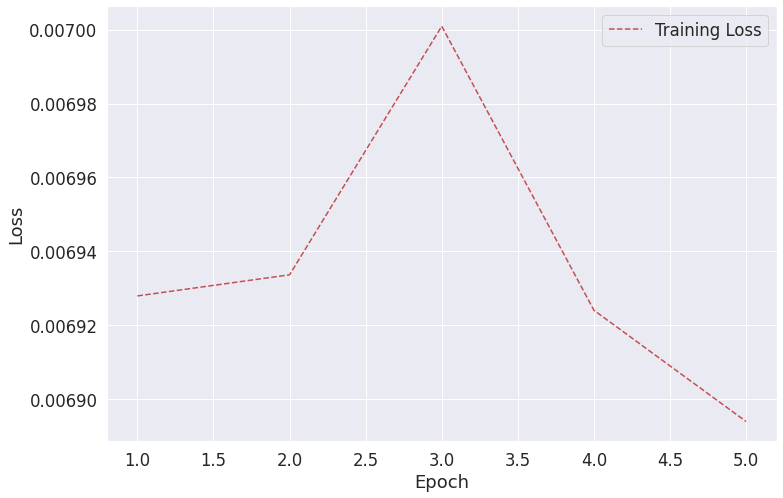

In [23]:
#plot the loss
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

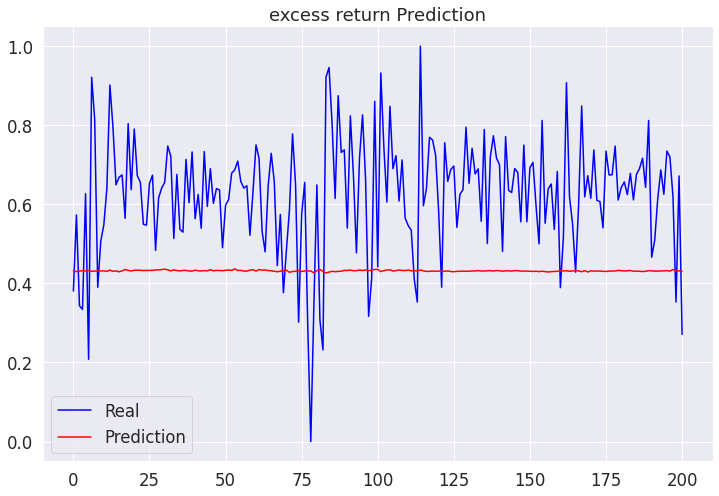

In [24]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('excess return Prediction')
plt.legend()
plt.show()

In [25]:
#define the R2OOS funciton 
def R2OOS(r_real, r_hat, r_bar):
    denominator_res=(r_real-r_bar)**2
    denominator=np.sum(denominator_res)
    numerator_res=(r_real-r_hat)**2
    numerator=np.sum(numerator_res)
    r2oos=1-numerator/denominator   
    return r2oos

In [26]:
#define r_real, r_hat, r_bar
r_real=np.array(test_y).reshape(201)
r_hat=pred.reshape(201)
r_bar=[]

for i in range(899,1100):
  sample=np.array(y[:(i+1)])
  r_bar.append(sample.mean())

r_bar=np.array(r_bar)

In [27]:
print('R2OOS Score: ', R2OOS(r_real, r_hat, r_bar))

R2OOS Score:  0.0008916588101958167
